# 붓꽃분류

- 통계적 분류기
- 주어진 데이터가 특정 클래스에 속하는지를 조건부 확률을 통해서 예측
- 베이즈 이론을 적용한 기계학습 방법
- 텍스트 데이터처럼 희소한 고차원인 경우 정확도와 속도를 제공
- 적용 분야 : spam 메일 분류, 문서(주제) 분류, 컴퓨터 네트워크 침입자 분류

## 패키지 로딩

In [23]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve

In [2]:
iris = load_iris()

In [24]:
x, y = load_iris(return_X_y=True)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, stratify= y, random_state= 123)

## 모델 생성

In [27]:
# Gaussian NB : 설명변수가 연속형일 때
model = GaussianNB()
model.fit(x_train, y_train)


GaussianNB()

## 모델 평가

In [28]:
y_hat = model.predict(x_test)

In [29]:
acc = accuracy_score(y_test, y_hat)
acc

0.9777777777777777

In [33]:
cm = confusion_matrix(y_test, y_hat)
cm

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 15]], dtype=int64)

# 독버섯 분류하기
- 설명변수가 범주형

In [121]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, precision_score, roc_auc_score, plot_roc_curve, recall_score

In [123]:
mushrooms = pd.read_csv('./mushrooms.csv')

In [125]:
mushrooms.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [126]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   type                      8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

## label encoding

In [127]:
for col in mushrooms.columns:
    mushrooms[col] = LabelEncoder().fit_transform(mushrooms[col])

In [128]:
mushrooms.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,2,3,0,1,7,1,0,1,0,...,3,7,7,0,2,1,4,0,3,4
1,0,2,3,9,1,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,0,3,8,1,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
3,1,2,2,8,1,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
4,0,2,3,3,0,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0


## x값, y값

In [129]:
y = mushrooms['type']

In [130]:
x = mushrooms.drop('type', axis=1)

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, stratify= y, random_state= 123)

## 모델 생성 및 학습

In [134]:
model = MultinomialNB()

In [135]:
model.fit(x_train, y_train)

MultinomialNB()

## 모델 예측

In [136]:
y_hat = model.predict(x_test)

In [151]:
print(f"{'실제:':10s}", y_test[:10].values)
print(f"{'예측:':10s}", y_hat[:10])

실제:        [0 1 1 1 1 1 1 0 1 0]
예측:        [0 1 0 0 1 1 1 1 1 0]


## 모델 평가

In [137]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

In [152]:
cm = confusion_matrix(y_test, y_hat)
cm

array([[1108,  155],
       [ 261,  914]], dtype=int64)

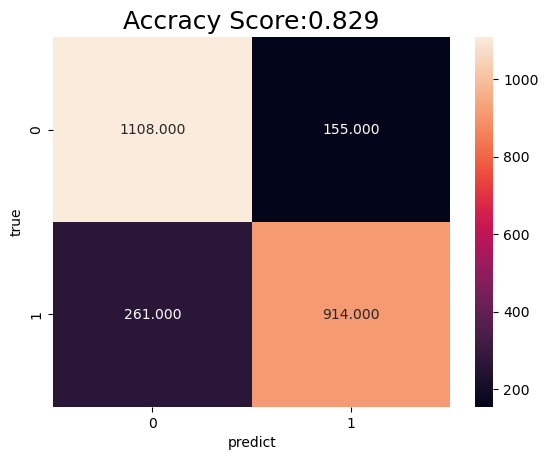

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='.3f')
plt.xlabel('predict')
plt.ylabel('true')
plt.title(f'Accracy Score:{accuracy_score(y_test, y_hat):.3f}', size = 18)
plt.show()

In [160]:
print(f'{"accuracy:":10s}', '{0:.3f}'.format(accuracy_score(y_test, y_hat)))
print(f'{"precision:":10s} {precision_score(y_test, y_hat):.3f}')
# 0을 negative, 1을 positive으로 함
# 만약에 y를 인코딩을 하지 않았을 경우-->  pos_label = 'poisonous'

print(f'{"recall:":10s} {recall_score(y_test, y_hat):.3f}')
print(f'{"f1 score:":10s} {f1_score(y_test, y_hat):.3f}')
print(f'{"AUC:":10s} {roc_auc_score(y_test, model.predict_proba(x_test)[:,1]):.3f}')

accuracy:  0.829
precision: 0.855
recall:    0.778
f1 score:  0.815
AUC:       0.901


In [156]:
model.classes_

array([0, 1])

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


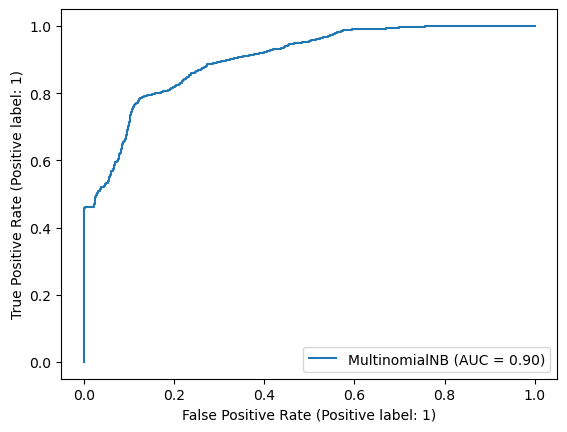

In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, x_test, y_test)
plt.show()

## 교차검증

In [83]:
from sklearn.model_selection import cross_validate

In [85]:
from sklearn.metrics import SCORERS

In [90]:
cross_validate_result= cross_validate (model, x, y, cv = 5, scoring =['precision','accuracy','f1','roc_auc','recall'] )

In [86]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [94]:
for a, b in cross_validate_result.items():
    print(f'{a}: {np.mean(b):.2f}')

fit_time: 0.01
score_time: 0.00
test_precision: 0.80
test_accuracy: 0.70
test_f1: 0.65
test_roc_auc: 0.85
test_recall: 0.64


In [ ]:
from sklearn.naive_bayes import BernoulliNB